# Motivação

O objetivo principal deste trabalho é estudar, entender e implementar as principais técnicas de análise e processamento de linguagem natural. Para que esse trabalho se torne possível, será necessário utilizar a biblioteca NLTK (Natural Language Toolkit) que possui ferramentas para realizar processamento simbólico e estatístico de linguagem natural.


* [Dcumentation NLTK - Natural Language Toolkit](https://www.nltk.org)
* [Natural Language Processing with Python Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book_1ed/)
* [Processing Raw Text](https://www.nltk.org/book_1ed/ch03.html)

# **Importar bibliotecas necessárias**

In [142]:
import nltk, urllib.request, os, re
import pandas as pd
from google.colab import drive 

# Download de todos os componentes necessários da biblioteca NLTK

In [ ]:
nltk.download('all')
nltk.download('stopwords')

# Criando as stopwords em português e inglês

In [144]:
english_stopwords = nltk.corpus.stopwords.words('english')
portuguese_stopwords = nltk.corpus.stopwords.words('portuguese')
spanish_stopwords = nltk.corpus.stopwords.words('spanish')

# Adiciona algumas stopwords em português para tratar algumas divergências analíticas
add_stopwords_pt = ['capitulo', 'capítulo']
portuguese_stopwords.extend(add_stopwords_pt)

# Criando a função de processamento de texto

O objetivo dessa função e remover as quebras de linhas e alguns caracteres especiais que não foram removidos com o decode

In [145]:
def processing_text(str_text, _stopwords):
  text_format = re.findall(r'\b[A-zÀ-úü]+\b', str_text.lower())

  if _stopwords:
    no_stopwords = [words for words in text_format if words not in _stopwords and not len(words) == 1]
  else:
    no_stopwords = text_format

  return(' '.join(no_stopwords))

# Escolhendo os textos a serem utilizados na função de processamento e realizar leitura de arquivos armazenados no Google Drive

Foram utilizadas as os livros da escritora J. K. Rowling, especificamente a série do Harry Potter.

Para acessar os livros do Harry Potter que estão armazenados no Google Drive, vamos realizar a montagem do Drive para conseguir acessar como se fosse um repositório local de um PC.

**PS: Vamos realizar a montagem apenas uma vez a cada execução do algoritmo, para não gastar processamento desnecessário.**

In [146]:
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Acessando o repositório que foi montado no Google Drive para coletar a lista de todos os livros da pasta.

In [147]:
_path_books_drive = '/content/drive/MyDrive/Harry_Potter/'

list_books_hp = sorted(os.listdir(_path_books_drive))

list_books_hp

["Book 1 - The Philosopher's Stone.txt",
 'Book 2 - The Chamber of Secrets.txt',
 'Book 3 - The Prisoner of Azkaban.txt',
 'Book 4 - The Goblet of Fire.txt',
 'Book 5 - The Order of the Phoenix.txt',
 'Book 6 - The Half Blood Prince.txt',
 'Book 7 - The Deathly Hallows.txt']

Realizar a leitura de cada livro e passar o texto na função de processamento para remover pontuações e stopwords.

In [154]:
books_hp_no_processed = []
books_hp_processed = []

for book in list_books_hp:
  with open(_path_books_drive + book, encoding='utf8') as f:
    _book = ''
    for line in f:
      if not line.startswith("Page |"):
          _book += line
    
    books_hp_no_processed.append(_book)
    books_hp_processed.append(processing_text(_book, english_stopwords))

Print do texto sem processamento e com o processamento da função.

In [ ]:
books_hp_no_processed[0]

In [ ]:
books_hp_processed[0]

# Códigos de terminal baseados em Linux

É possível utilizar comandos Linux para navegar pelo diretório depois que ele foi montado no comando acima.

In [ ]:
!dir /content/drive/MyDrive/Harry_Potter/

Book\ 1\ -\ The\ Philosopher's\ Stone.txt
Book\ 2\ -\ The\ Chamber\ of\ Secrets.txt
Book\ 3\ -\ The\ Prisoner\ of\ Azkaban.txt
Book\ 4\ -\ The\ Goblet\ of\ Fire.txt
Book\ 5\ -\ The\ Order\ of\ the\ Phoenix.txt
Book\ 6\ -\ The\ Half\ Blood\ Prince.txt
Book\ 7\ -\ The\ Deathly\ Hallows.txt


# Tokenização dos textos

A tokenização, também conhecida como segmentação de palavras, é responsável por quebrar as palavras de cada texto analisado, ou seja, ele identifica o início e o término das palavras do texto e faz a divisão.

- Exemplo sem tokenização: "Harry Potter é a melhor série de todos os tempos"

- Texto tokenizado: "Harry", "Potter", "é", "a", "melhor", "série", "de", "todos", "os", "tempos"

In [156]:
tokens_hp_book_one = nltk.tokenize.word_tokenize(books_hp_processed[0])
tokens_hp_book_two = nltk.tokenize.word_tokenize(books_hp_processed[1])
tokens_hp_book_seven = nltk.tokenize.word_tokenize(books_hp_processed[6])

# Análise de frequência de palavras

Uma distribuição de frequência pode ser usada para registrar a frequência de cada tipo de palavra em um documento, ou seja, essa função tem por objetivo calcular a inscidencia de vezes que uma palavra foi mencionada em um texto, documento, string.

In [157]:
prob_ho_book_one = nltk.probability.FreqDist(tokens_hp_book_one)
prob_ho_book_two = nltk.probability.FreqDist(tokens_hp_book_two)
prob_ho_book_seven = nltk.probability.FreqDist(tokens_hp_book_seven)

# Print das 10 palavras que mais se repetem nos textos

In [158]:
print(prob_ho_book_one.most_common(10))
print(prob_ho_book_two.most_common(10))
print(prob_ho_book_seven.most_common(10))

[('harry', 1325), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 269), ('back', 261), ('one', 256), ('know', 214), ('got', 207), ('could', 198)]
[('harry', 1658), ('said', 1218), ('ron', 706), ('hermione', 320), ('back', 279), ('lockhart', 234), ('one', 222), ('malfoy', 222), ('could', 211), ('professor', 192)]
[('harry', 3193), ('said', 1978), ('hermione', 1224), ('ron', 1176), ('could', 646), ('wand', 596), ('dumbledore', 589), ('back', 547), ('know', 541), ('like', 458)]


# Palavra que mais se repete

In [159]:
print('Palavra que mais se repete no texto de ' + list_books_hp[0] + ': ' + prob_ho_book_one.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[1] + ': ' + prob_ho_book_two.max())
print('Palavra que mais se repete no texto de ' + list_books_hp[6] + ': ' + prob_ho_book_seven.max())

Palavra que mais se repete no texto de Book 1 - The Philosopher's Stone.txt: harry
Palavra que mais se repete no texto de Book 2 - The Chamber of Secrets.txt: harry
Palavra que mais se repete no texto de Book 7 - The Deathly Hallows.txt: harry


# Plot de 20 palavras que mais se repete nos livros

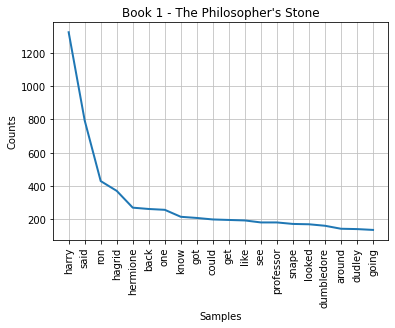

In [160]:
prob_ho_book_one.plot(20, title=list_books_hp[0].replace('.txt', ''))

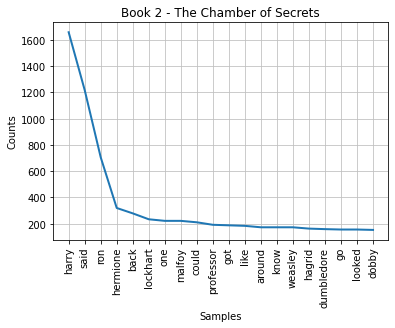

In [161]:
prob_ho_book_two.plot(20, title=list_books_hp[1].replace('.txt', ''))

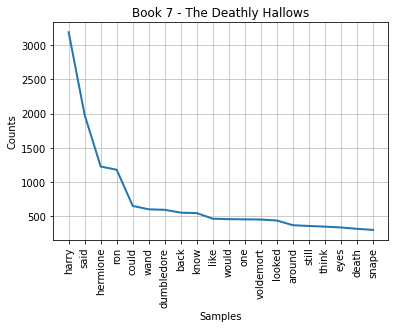

In [162]:
prob_ho_book_seven.plot(20, title=list_books_hp[6].replace('.txt', ''))

In [163]:
analytics_hp_book_one = nltk.Text(tokens_hp_book_one)
analytics_hp_book_two = nltk.Text(tokens_hp_book_two)
analytics_hp_book_seven = nltk.Text(tokens_hp_book_seven)

# Palavras similares

In [164]:
analytics_hp_book_one.similar('harry')

ron hagrid hermione said malfoy would dumbledore neville snape got get
right voldemort whispered yeh quirrell boy say dudley yes


In [165]:
analytics_hp_book_two.similar('harry')

ron hermione hagrid said fred riddle malfoy dumbledore right lockhart
george percy oh myrtle time know come thing hello looking


In [166]:
analytics_hp_book_seven.similar('voldemort')

harry hermione said dumbledore ron bellatrix lupin wanted felt wand
going think snake say knew doge familiar saw really quietly


# Palavras dentro de diferentes contextos

In [169]:
analytics_hp_book_one.concordance('hagrid')

Displaying 25 of 370 matches:
bledore though put back pocket said hagrid late suppose told way yes said prof
ought might hiding harry underneath hagrid bringing think wise trust hagrid so
th hagrid bringing think wise trust hagrid something important would trust hag
rid something important would trust hagrid life said dumbledore saying heart r
scular arms holding bundle blankets hagrid said dumbledore sounding relieved l
ct map london underground well give hagrid better get dumbledore took harry ar
 could could say good bye sir asked hagrid bent great shaggy head harry gave m
ust scratchy whiskery kiss suddenly hagrid let howl like wounded dog shhh hiss
cgonagall wake muggles sorry sobbed hagrid taking large spotted handkerchief b
r live muggles yes yes sad get grip hagrid found professor mcgonagall whispere
fessor mcgonagall whispered patting hagrid gingerly arm dumbledore stepped low
te three stood looked little bundle hagrid shoulders shook professor mcgonagal
well go join celebrati

In [168]:
analytics_hp_book_two.concordance('ron')

Displaying 25 of 706 matches:
g quidditch harry missed best friends ron weasley hermione granger however seem
ng neither written summer even though ron said going ask harry come stay countl
t unlocking hedwig cage magic sending ron hermione letter worth risk underage w
ast fat legs would carry long silence ron hermione made harry feel cut magical 
orld even taunting dudley lost appeal ron hermione forgotten birthday give mess
 quickly know lots people like friend ron stopped thinking ron painful dobby le
ople like friend ron stopped thinking ron painful dobby leaned toward harry eye
arry could make hermione neat writing ron untidy scrawl even scribble looked th
e faced red haired long nosed someone ron weasley outside harry window burrow r
n weasley outside harry window burrow ron breathed harry creeping window pushin
eeping window pushing could talk bars ron harry mouth fell open full impact see
outh fell open full impact seeing hit ron leaning back window old turquoise car
rinning ha

In [ ]:
analytics_hp_book_seven.concordance('voldemort')

Displaying 25 of 446 matches:
emed emit pearly glow severus said voldemort indicating seat immediate right ya
s eyes around table followed snape voldemort spoke first lord order phoenix int
fened others fidgeted gazing snape voldemort saturday nightfall repeated voldem
demort saturday nightfall repeated voldemort red eyes fastened upon snape black
e snape however looked calmly back voldemort face moment two voldemort lipless 
mly back voldemort face moment two voldemort lipless mouth curved something lik
ley leaned forward look long table voldemort snape faces turned lord heard diff
rd heard differently yaxley waited voldemort speak went dawlish auror let slip 
e wheezy giggle echoed along table voldemort laugh gaze wandered upward body re
ire party aurors used transfer boy voldemort held large white hand yaxley subsi
xley subsided watching resentfully voldemort turned back snape going hide boy n
nchantments break rest well yaxley voldemort called table firelight glinting st
isted face

# Bigramas de texto

In [170]:
analytics_hp_book_one.collocations()

uncle vernon; professor mcgonagall; aunt petunia; said ron; said
hagrid; said harry; crabbe goyle; privet drive; common room; fred
george; madam pomfrey; mrs dursley; invisibility cloak; mrs norris;
nimbus two; madam hooch; nicolas flamel; leaky cauldron; first years;
sorcerer stone


In [171]:
analytics_hp_book_two.collocations()

professor mcgonagall; said ron; uncle vernon; chamber secrets; mrs
weasley; fred george; headless nick; said harry; madam pomfrey; nearly
headless; harry potter; gilderoy lockhart; moaning myrtle; aunt
petunia; hospital wing; mrs norris; common room; sorting hat;
professor sprout; crabbe goyle


In [172]:
analytics_hp_book_seven.collocations()

death eaters; deathly hallows; mrs weasley; said harry; godric hollow;
invisibility cloak; said ron; death eater; hallows rowling; ron
hermione; said hermione; professor mcgonagall; mad eye; phineas
nigellus; elder wand; harry potter; potter deathly; uncle vernon; dark
lord; auntie muriel


# Teste de leitura de informações coletadas em um site

In [ ]:
text_web = urllib.request.urlopen("https://www.gutenberg.org/files/68611/68611-0.txt").read()

book_gutemberg = processing_text(str(text_web, 'utf8'), english_stopwords)

print(book_gutemberg)